# **Bike Sharing Demand Prediction**

---

## **Problem Statement**


* Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

* The requirement is to predict number of bikes required at each hour for smooth supply.

## **Machine Learning Project Life cycle**

1. Data Collection
2. Data Preparation
    1. Exploratory Data Analysis (EDA)
        1. Univariate Analysis
        2. Multivariate Analysis
    2. Data Preprocessing
        1. Feature imputation
        2. Feature encoding
        3. Feature selection
3. Model Building
    1. Choosing an algorithm
    2. Hyperparameter Tuning
    3. Performance metrics 
4. Model Deployment

##  1. Data Collection

Based on requirement, Data can be collected by multiple ways such as:
1. By using site specific APIs
2. By means of webscraping(if particular website allows)
3. by online surveys
4. From database etc.

The dataset used for this prediction is taken from kaggle.

### Dataset Attributes Information

- **Date**: Date of Rented Bike
- **Rented Bike count**: Number of total rentals
- **Hour**: Hours of the day
- **Temperature(°C)**: Weather Temperature in °C
- **Humidity(%)**: Humidity of the day in %
- **Wind speed (m/s)**: Wind speed in m/s
- **Visibility (10m)**: Atmospherical Visibility within 10 𝑚 range
- **Dew point temperature(°C)**: Dew Point Temperature - T dp in °C
- **Solar Radiation (MJ/m2)**: Indicate light and energy that comes from the sun in MJ/m2
- **Rainfall(mm)**: Rain fall in mm
- **Snowfall (cm)**: Snow fall in cm
- **Seasons**: Autumn, Spring, Summer, Winter
- **Holiday**: Whether the day is considered a holiday
- **Functioning Day**: Whether the day is neither a weekend nor holiday

In [1]:
#import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder, OrdinalEncoder, RobustScaler, FunctionTransformer, OneHotEncoder, PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,KFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC,SVR
from collections import Counter
from scipy import stats
from xgboost import XGBClassifier, XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import set_config

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import dataset from kaggle
df = pd.read_csv(r"/kaggle/input/seoul-bike-sharing-demand-prediction/SeoulBikeData.csv",encoding= 'unicode_escape')

In [3]:
#read first 5 rows of dataset 
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
#read last 5 rows of dataset
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
#brief information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
#for easiness let us rename some columns names as per description
df=df.rename(columns={'Rented Bike Count':'Bike count per hour',
                      'Hour':'nth hour',
                      'Temperature(°C)':'Temperature',
                      'Humidity(%)':'Humidity',
                      'Wind speed (m/s)':'Wind speed',
                      'Visibility (10m)':'Visibility',
                      'Dew point temperature(°C)':'Dew point temperature',
                      'Solar Radiation (MJ/m2)':'Solar Radiation',
                      'Rainfall(mm)':'Rainfall',
                      'Snowfall (cm)':'Snowfall'})
df.head()

,Date,Bike count per hour,nth hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
#shape of the dataset
df.shape

(8760, 14)

In [8]:
# features in dataset
df.columns

Index(['Date', 'Bike count per hour', 'nth hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Bike count per hour    8760 non-null   int64  
 2   nth hour               8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [10]:
#convert object dtype to timstamp using pandas
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Bike count per hour    8760 non-null   int64         
 2   nth hour               8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Solar Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [12]:
#check for duplicate samples 
df[df.duplicated()]

,Date,Bike count per hour,nth hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day


In [13]:
#split timestamp into date, month and year
df_copy = df.copy()
df_copy['Day'] = df_copy['Date'].dt.day
df_copy['Month'] = df_copy['Date'].dt.month
df_copy['Year'] = df_copy['Date'].dt.year

In [14]:
#drop Date feature
df = df.drop('Date',axis=1)

In [15]:
#checking for missing values in dataset
df.isnull().sum()

Bike count per hour      0
nth hour                 0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

## Univariate Analysis

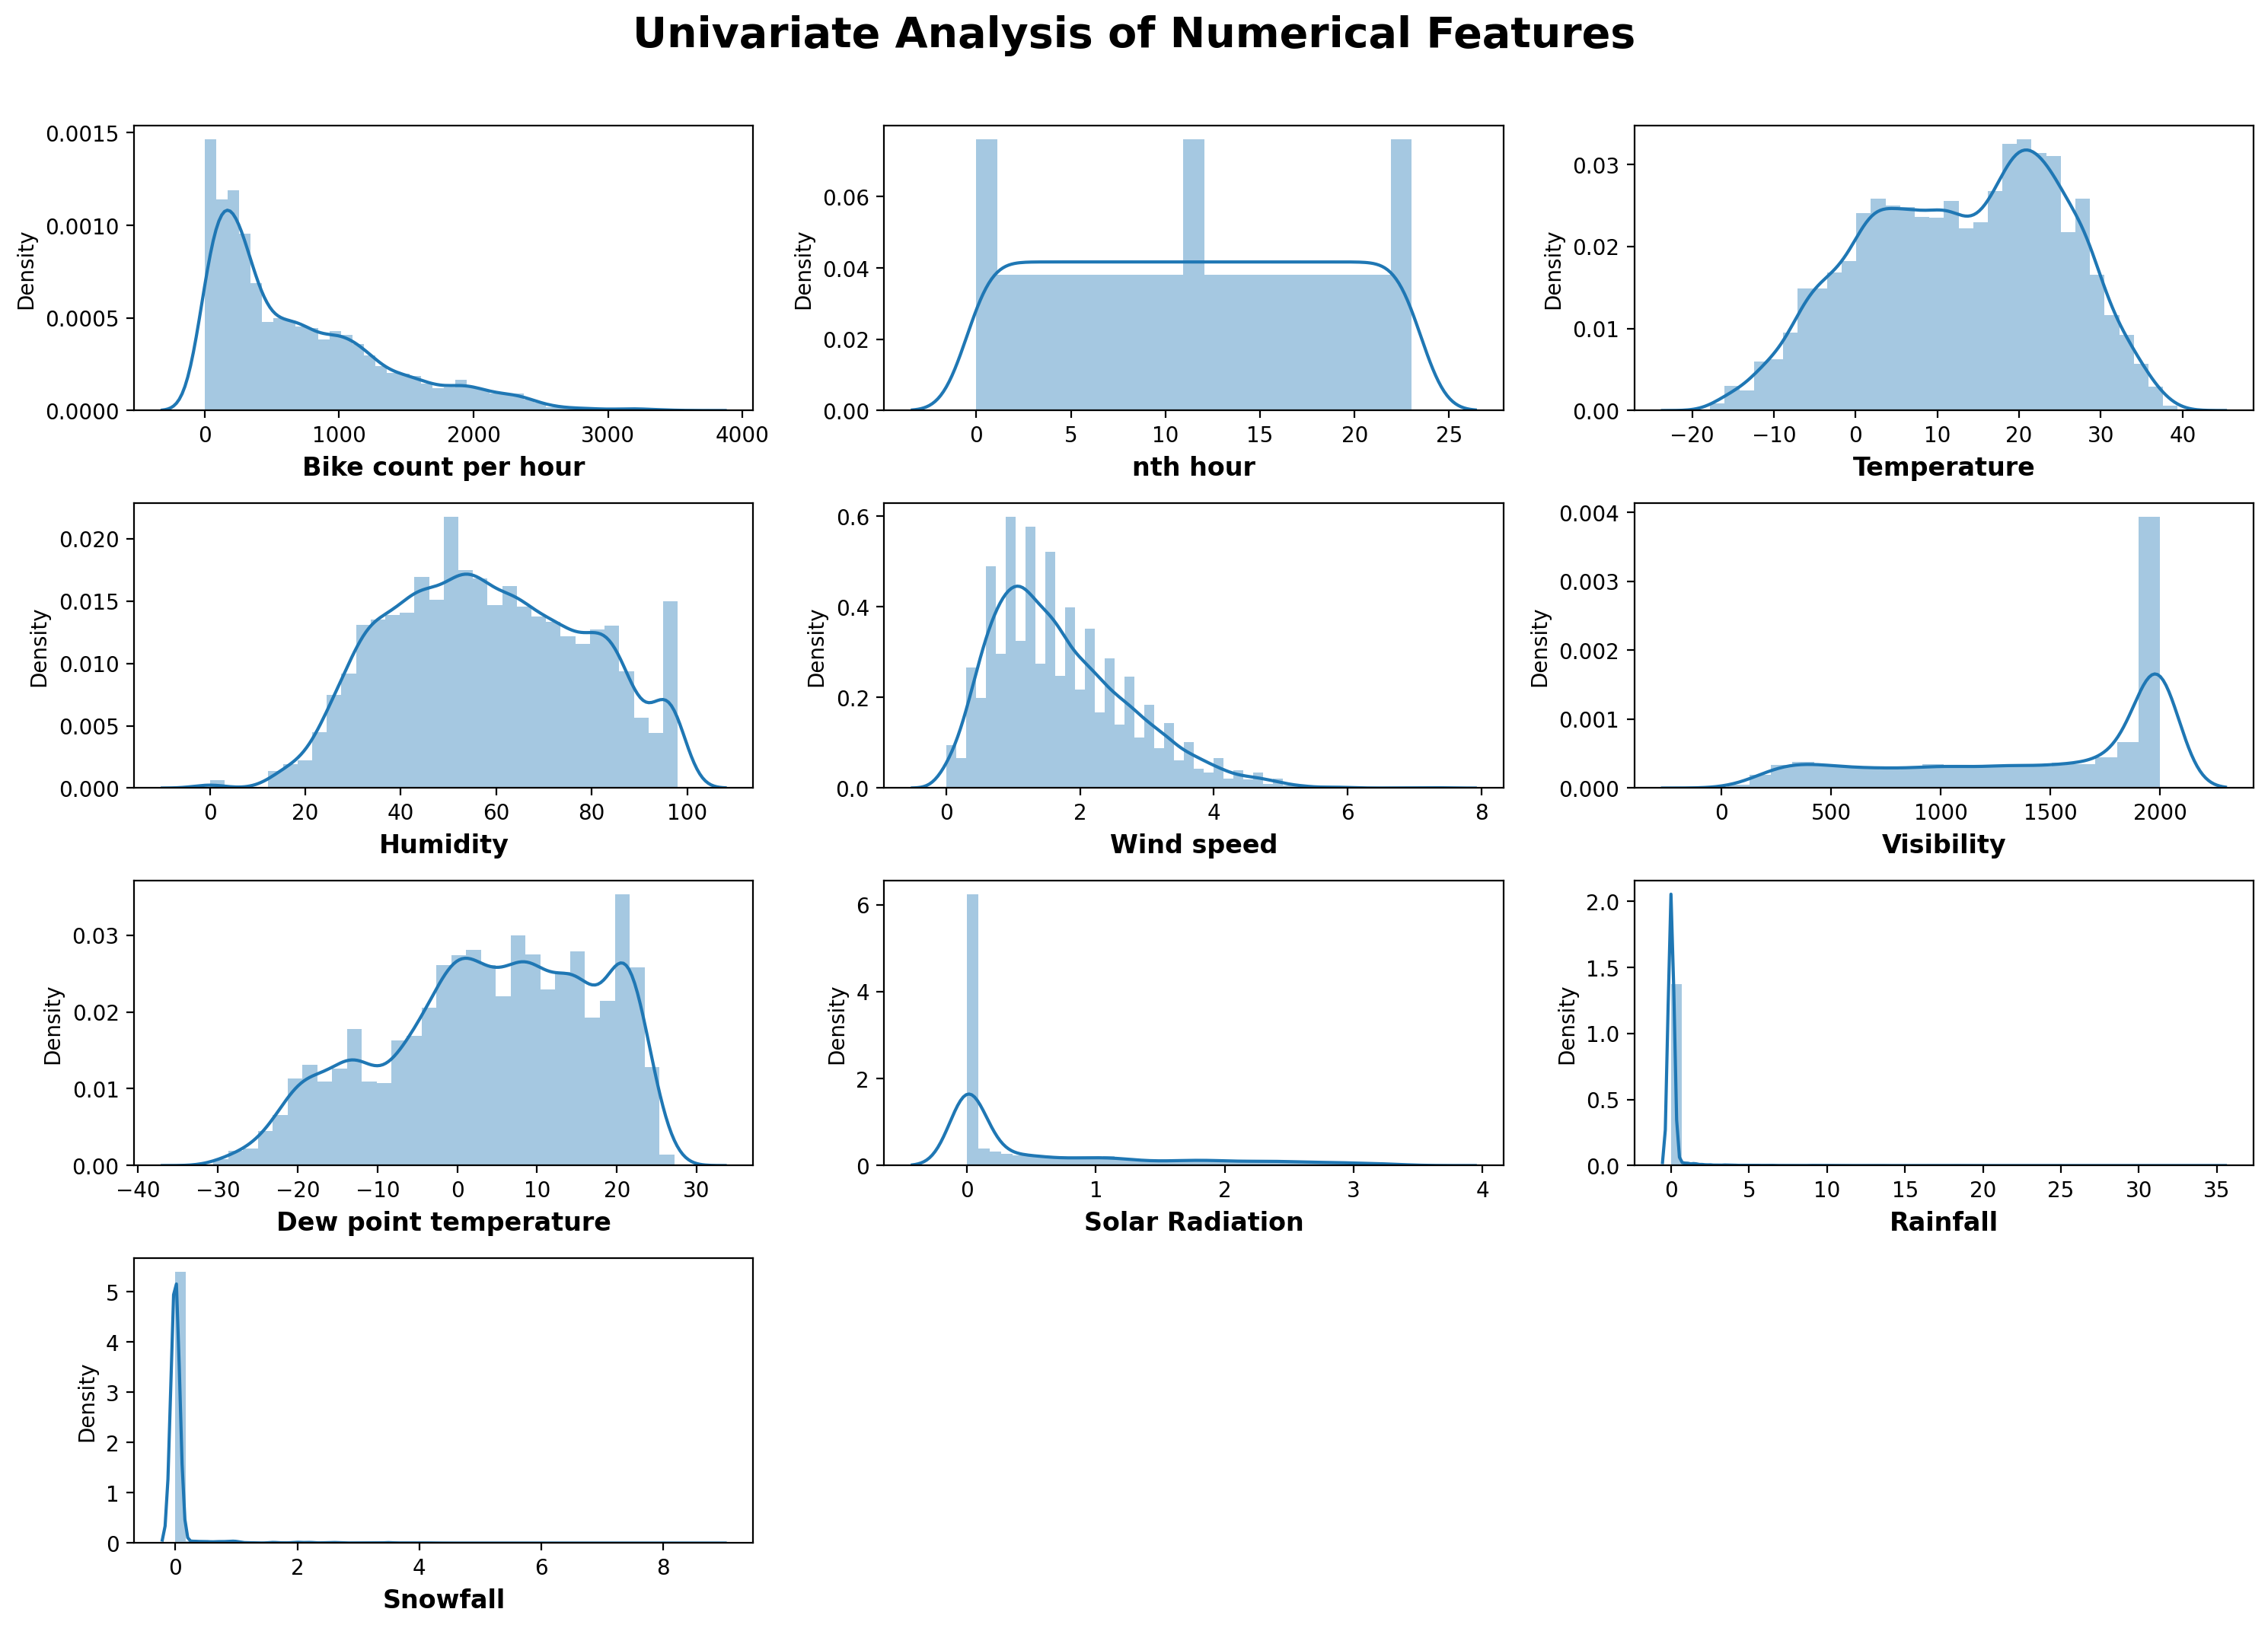

In [16]:
#check out the distribution of all numerical features

def univariate_plot_numerical(df):
    plt.figure(figsize=(15, 15),dpi=200)
    plt.suptitle('Univariate Analysis of Numerical Features',fontsize = 20, fontweight = 'bold',alpha = 1, y = 1.01)

    i = 0
    for col in df:
        if (df[col].dtype !='object'):
            plt.subplot(6,3,i+1)
            sns.distplot(x = df[col])
            plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
            plt.tight_layout()
            i+=1
            
univariate_plot_numerical(df)

Observation:
 - The Temperature, Humidity and Dewpoint Temperature are close to normal distribution.
 - Bike Count per Hour and Wind speed are right skewed distribution.
 - visibilty is left skewed.

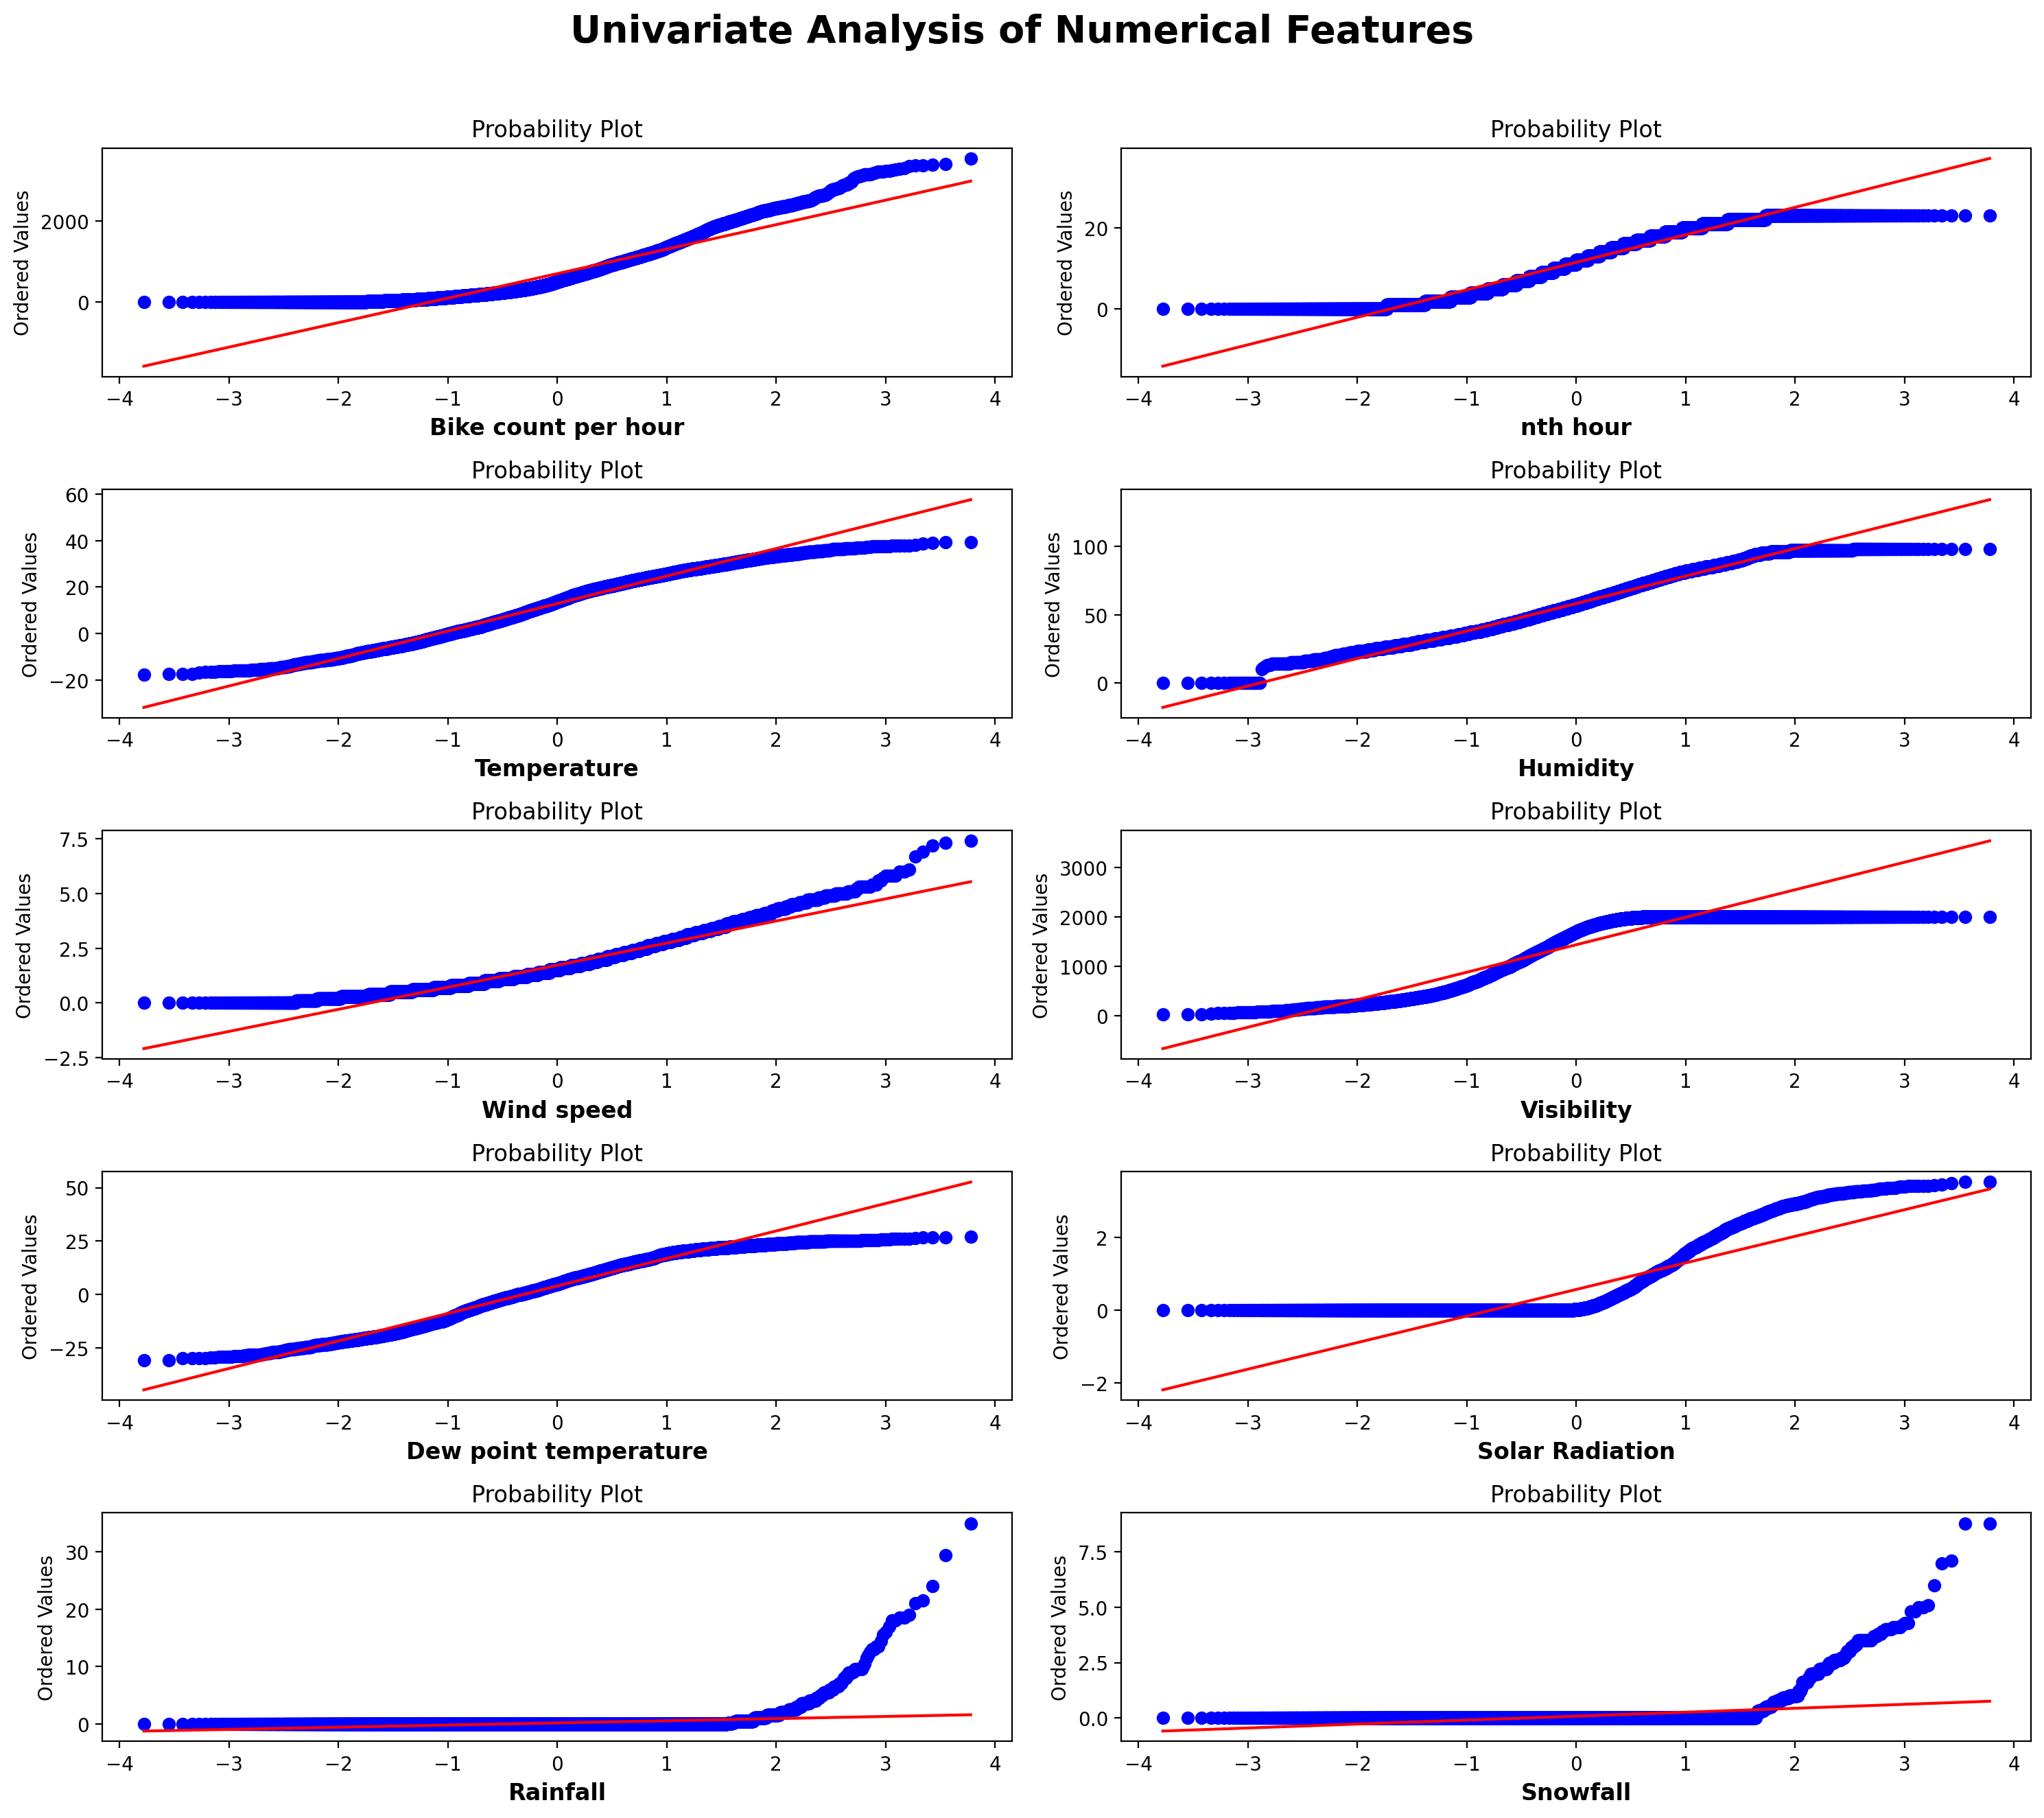

In [17]:
#check out the probabilty plot of all numerical features

def univariate_plot_numerical(df):
    plt.figure(figsize=(15, 20),dpi=200)
    plt.suptitle('Univariate Analysis of Numerical Features',fontsize = 20, fontweight = 'bold',alpha = 1, y = 1.01)

    i = 0
    for col in df:
        if (df[col].dtype !='object'):
            plt.subplot(8,2,i+1)
            stats.probplot(df[col],dist = 'norm', plot = plt)
            plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
            plt.tight_layout()
            i+=1
            
univariate_plot_numerical(df)

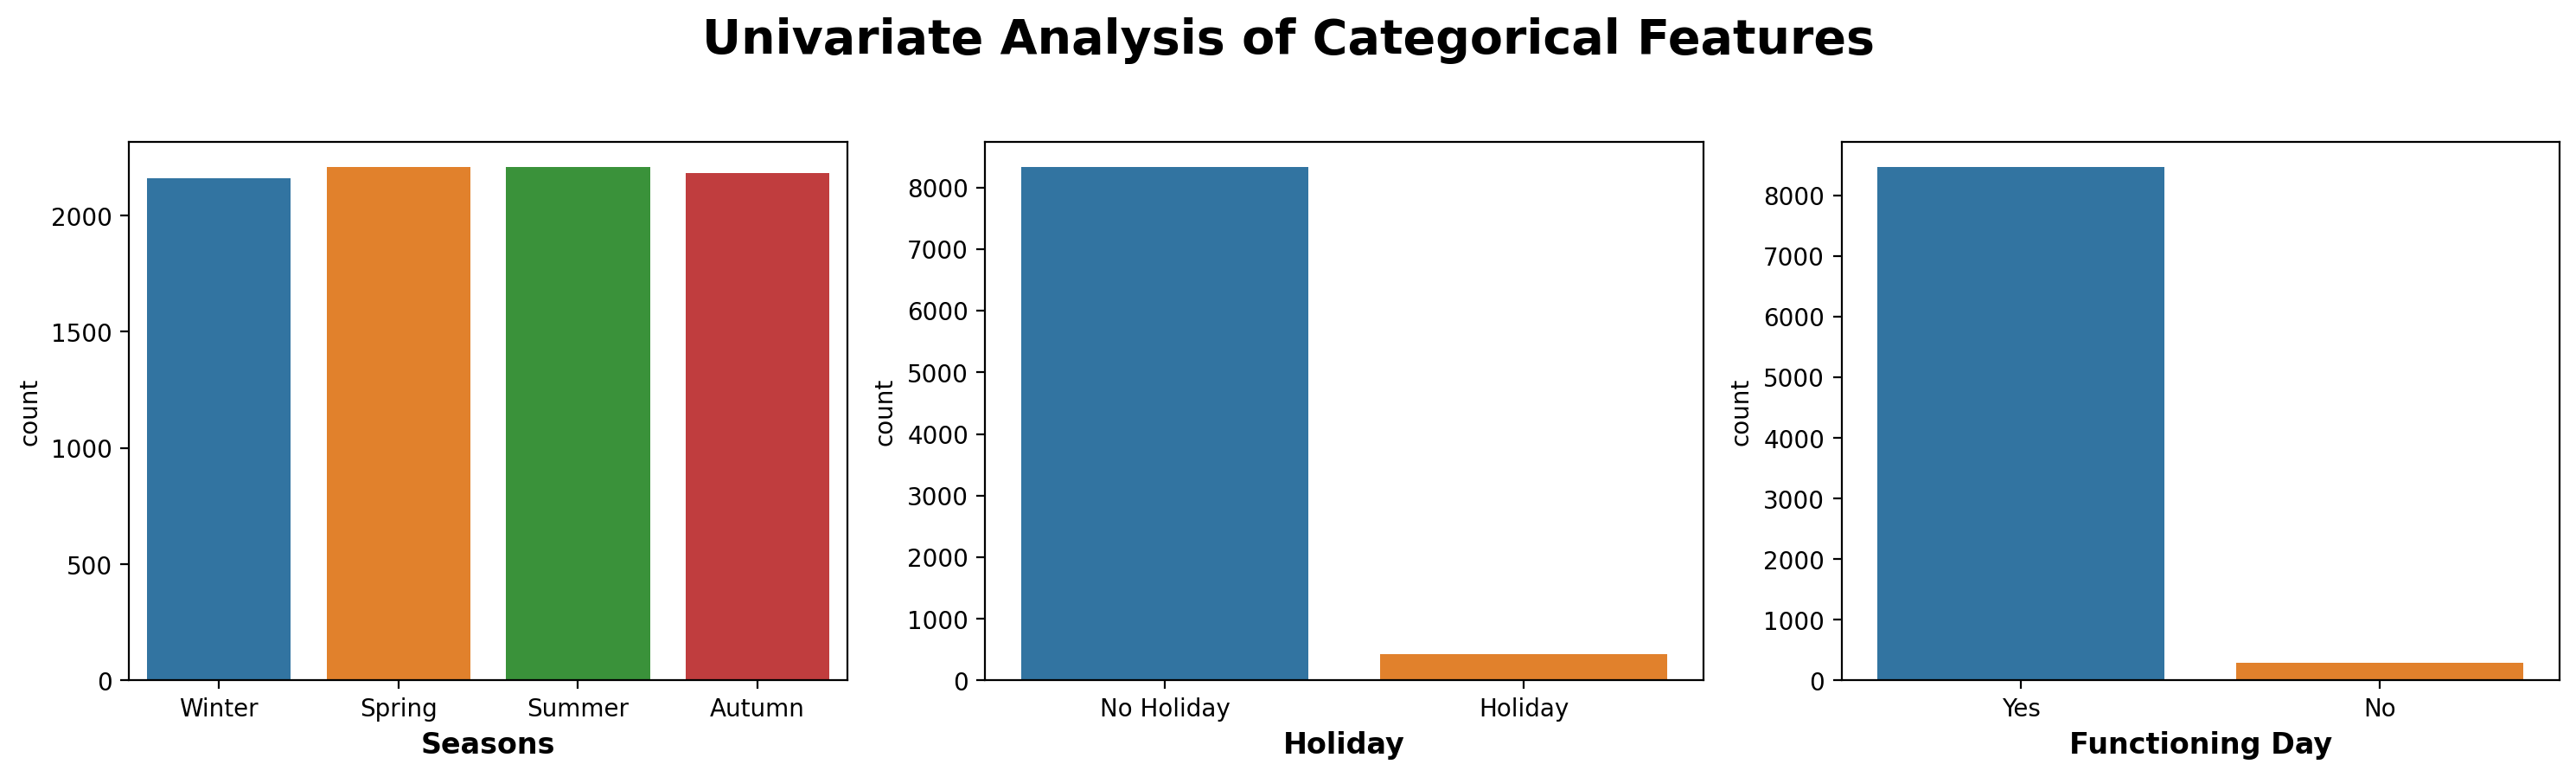

In [18]:
#check out the distribution of all categorical features

def univariate_plot_categorical(df):
    plt.figure(figsize=(15, 15),dpi=200)
    plt.suptitle('Univariate Analysis of Categorical Features',fontsize = 20, fontweight = 'bold',alpha = 1, y = 1.01)

    i = 0
    for col in df:
        if (df[col].dtype =='object'):
            plt.subplot(4,3,i+1)
            sns.countplot(x = col,data=df)
            plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
            plt.tight_layout()
            i+=1
            
univariate_plot_categorical(df)

In [19]:
#function to get value_counts corresponding to unique categories
def get_unique_categories(data):
    for column in data:
        if (data[column].dtype == 'object'): 
            print(column,'\n-------')
            print(data[column].value_counts(dropna=True))
            print('='*27)
        
#value_count_df
get_unique_categories(data = df)

Seasons 
-------
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
Holiday 
-------
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
Functioning Day 
-------
Yes    8465
No      295
Name: Functioning Day, dtype: int64


In [20]:
#statistics of the dataset
df.describe()

,Bike count per hour,nth hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


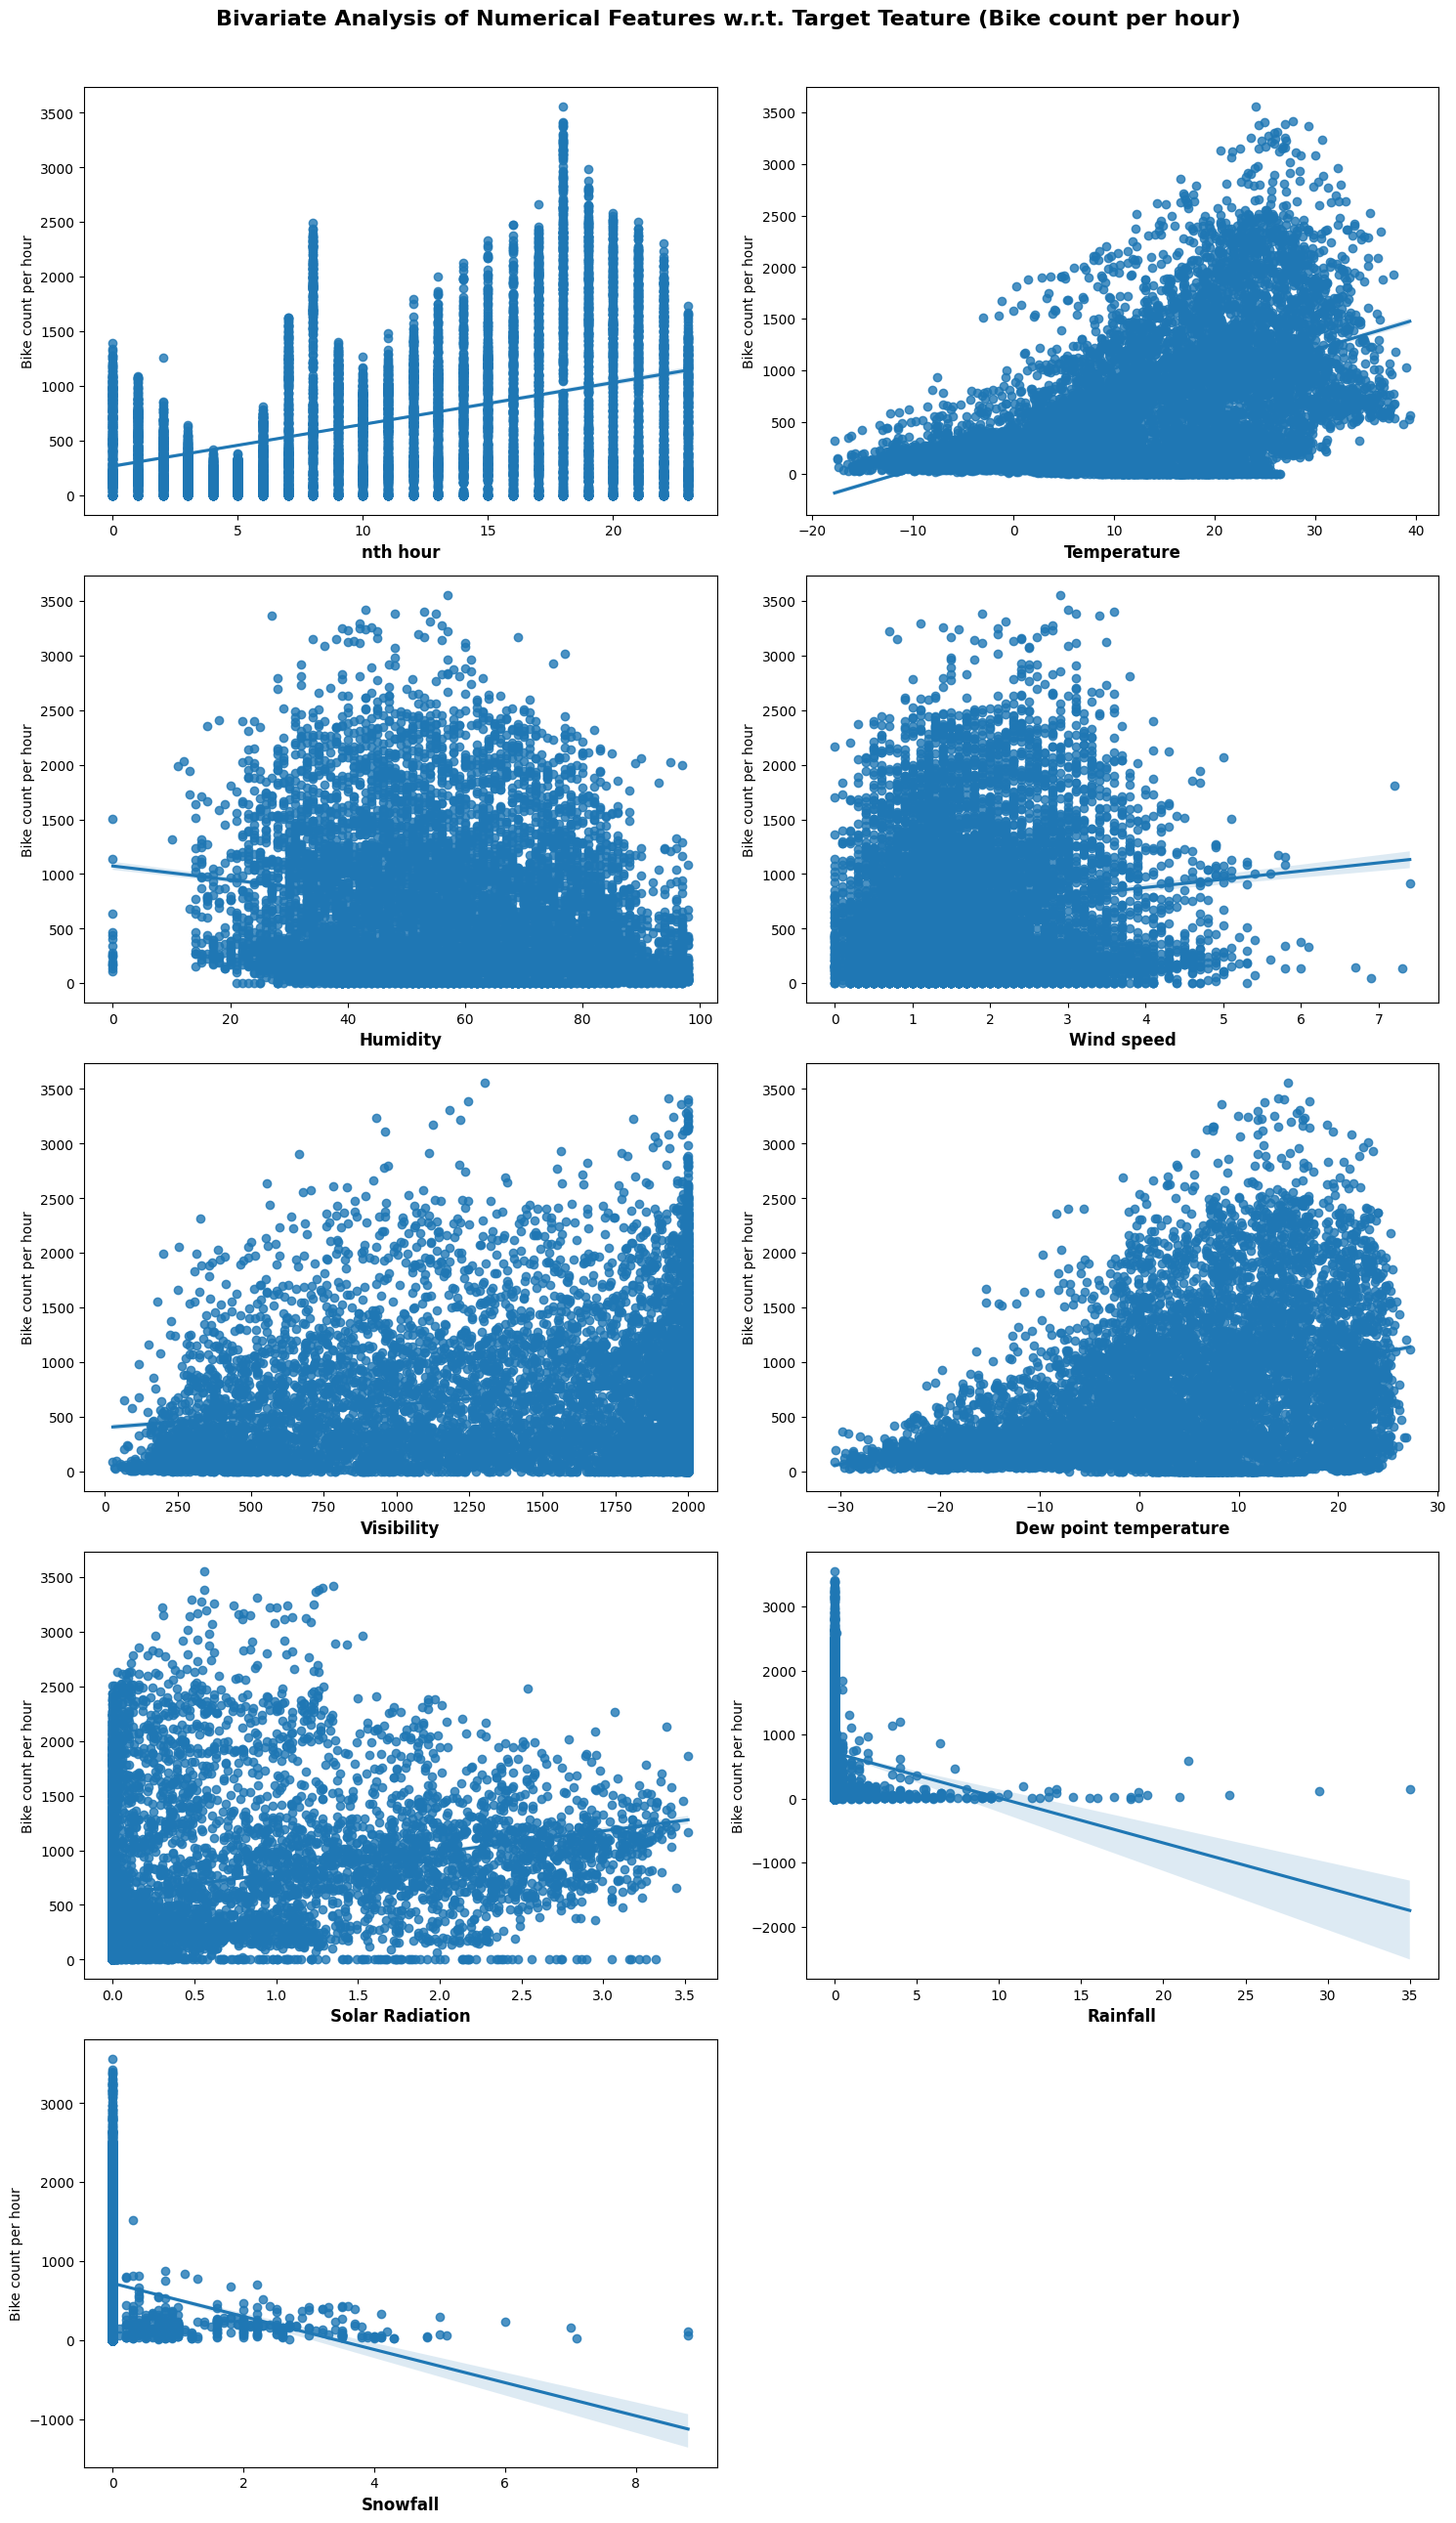

In [21]:
#Bivariate Analysis of Numerical Features w.r.t. Target Teature (Bike count per hour) 
plt.figure(figsize=(15, 30),dpi = 100)
plt.suptitle('Bivariate Analysis of Numerical Features w.r.t. Target Teature (Bike count per hour)',fontsize = 16, fontweight = 'bold',alpha = 1, y = 1.01)

i = 0
for col in df:
    if (df[col].dtype != 'object') and (col not in ['Bike count per hour']):
        plt.subplot(6,2,i+1)
        sns.regplot(x = col, y = 'Bike count per hour', data = df)
        plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
        plt.tight_layout()
        i+=1

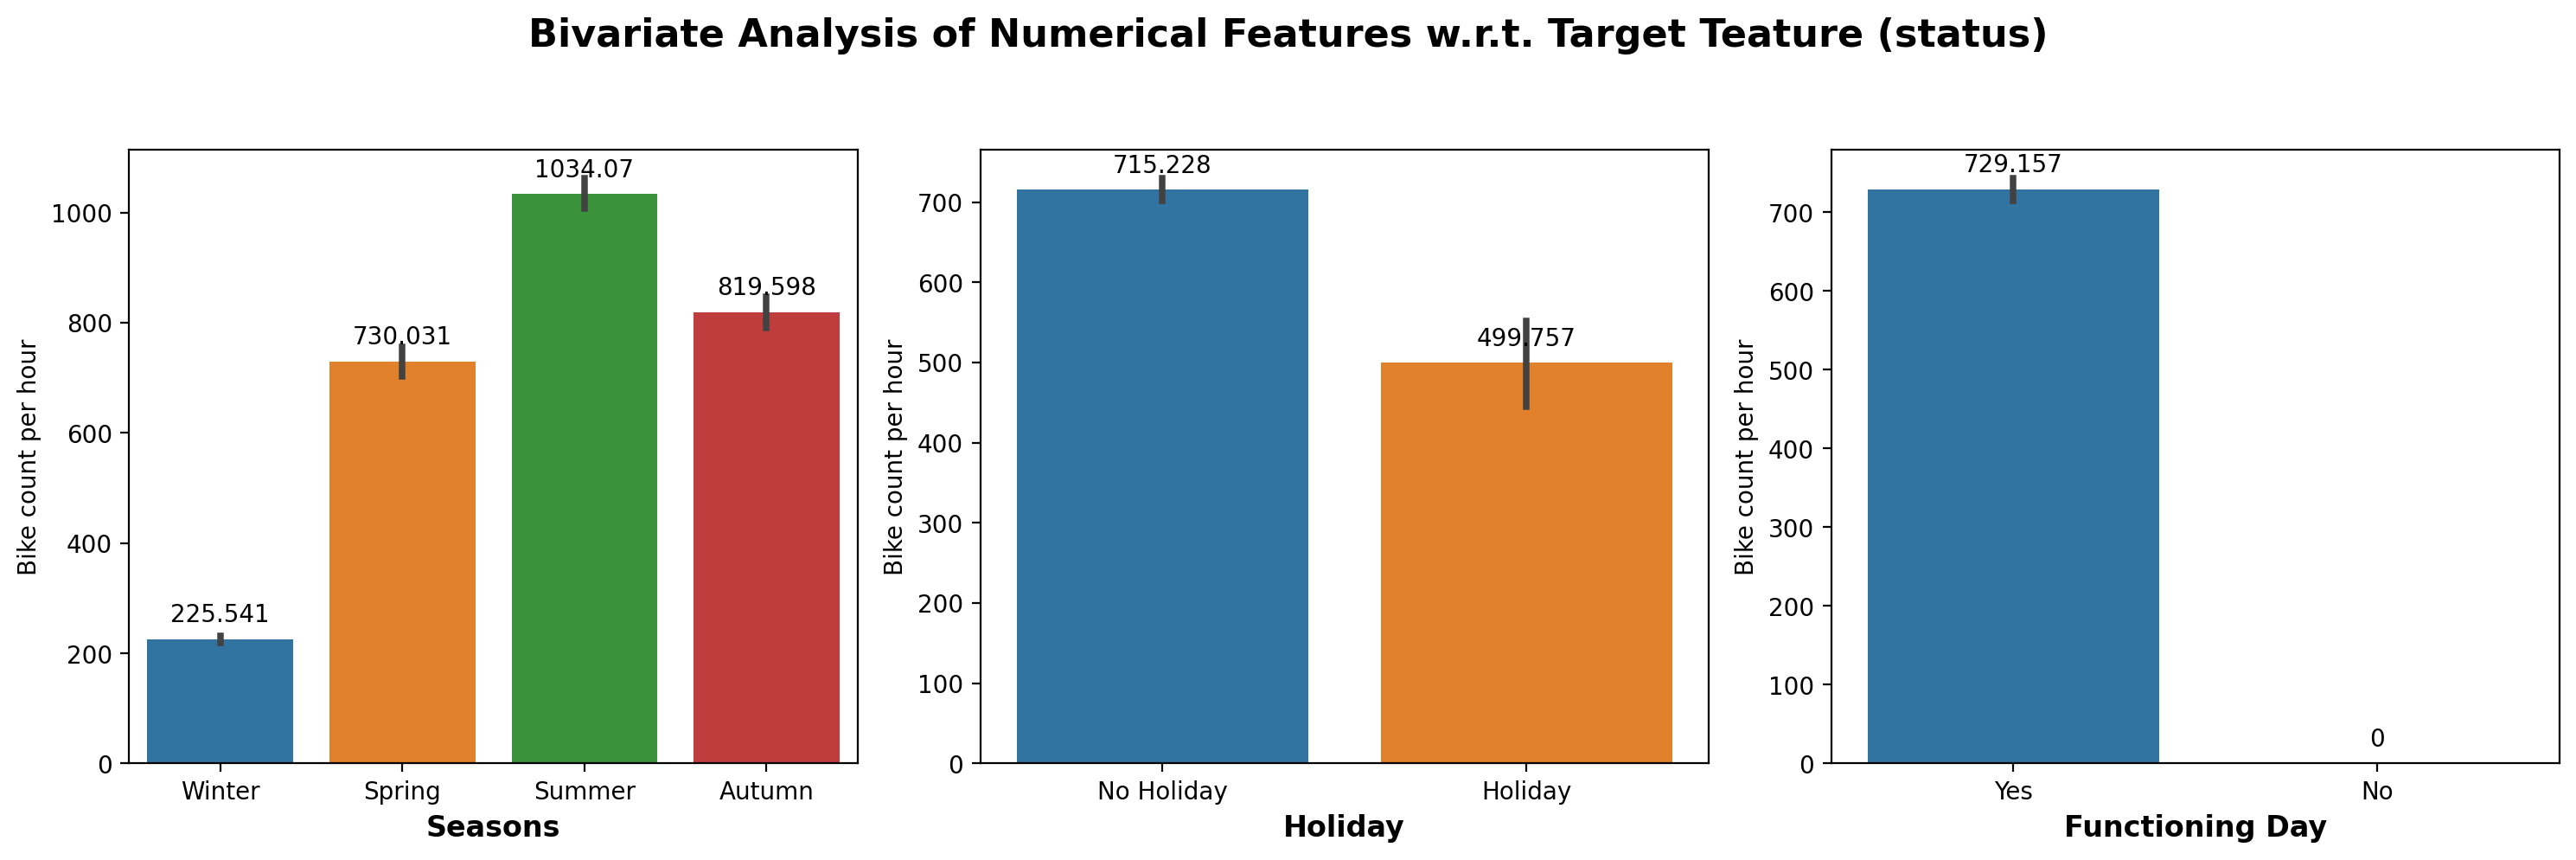

In [22]:
#Bivariate Analysis of Categorical Features w.r.t. Target Teature (status) 
plt.figure(figsize=(15, 25),dpi = 200)
plt.suptitle('Bivariate Analysis of Numerical Features w.r.t. Target Teature (status)',fontsize = 16, fontweight = 'bold',alpha = 1, y = 1.01)

i = 0
for col in df:
    if (df[col].dtype == 'object'):
        plt.subplot(6,3,i+1)
        ax = sns.barplot(x = col, y = 'Bike count per hour', data = df) #display mean value of Bike count per hour per category 
        plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
        plt.tight_layout()
        i+=1
        for p in ax.containers:
            ax.bar_label(p,padding=5)
plt.show()

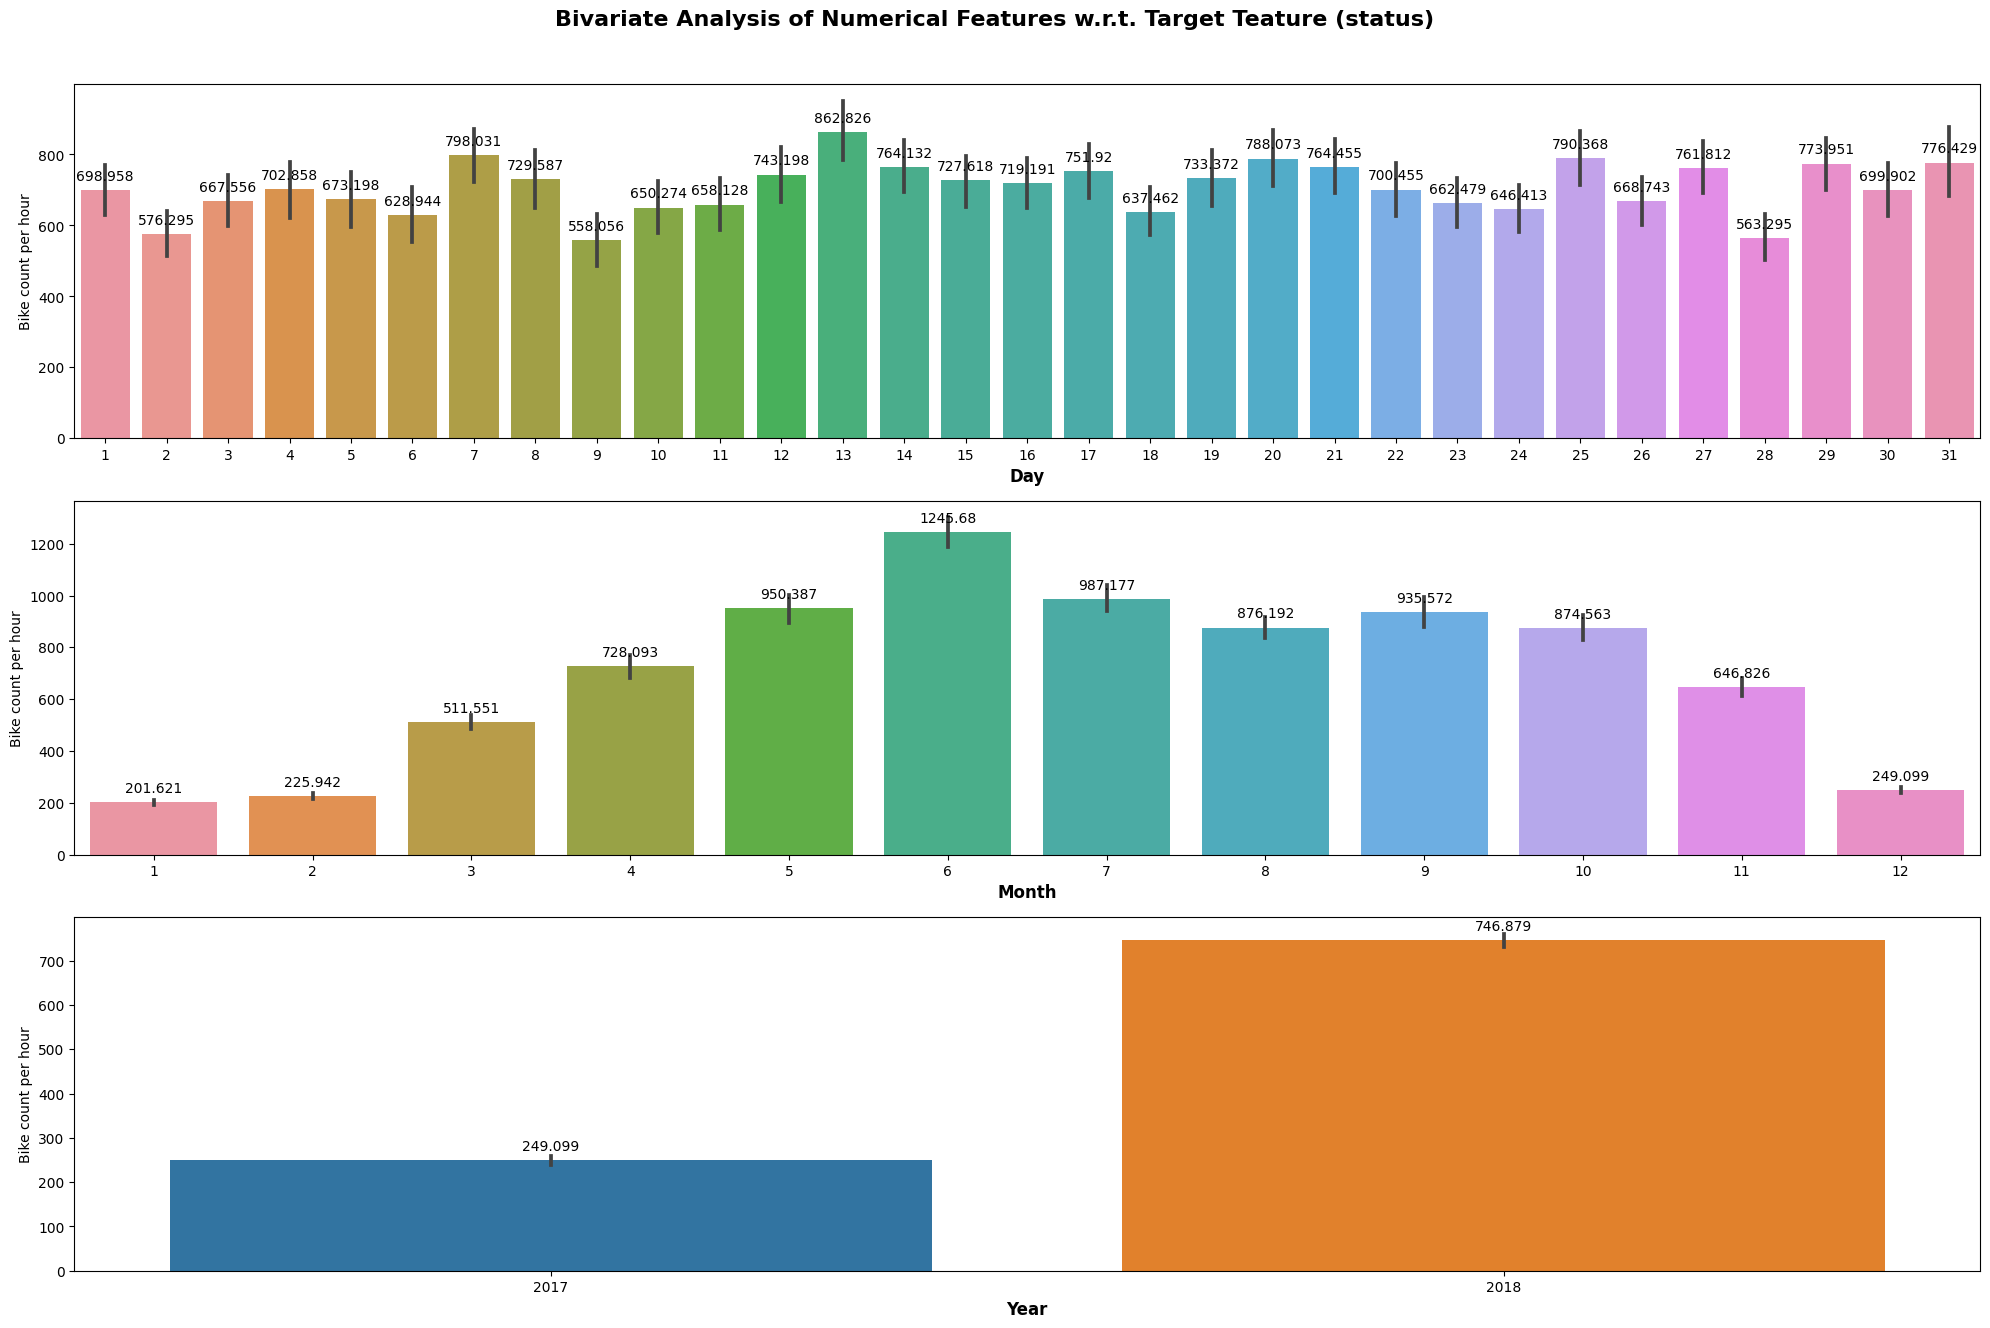

In [23]:
#Categorical distribution of date, month and year w.r.t. Target Teature (status) 
plt.figure(figsize=(20, 25),dpi = 100)
plt.suptitle('Bivariate Analysis of Numerical Features w.r.t. Target Teature (status)',fontsize = 16, fontweight = 'bold',alpha = 1, y = 1.01)

i = 0
for col in df_copy:
    if col in ['Day','Month','Year']:
        plt.subplot(6,1,i+1)
        ax = sns.barplot(x = col, y = 'Bike count per hour', data = df_copy) #display mean value of Bike count per hour per category 
        plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
        plt.tight_layout()
        i+=1
        for p in ax.containers:
            ax.bar_label(p,padding=5)
plt.show()

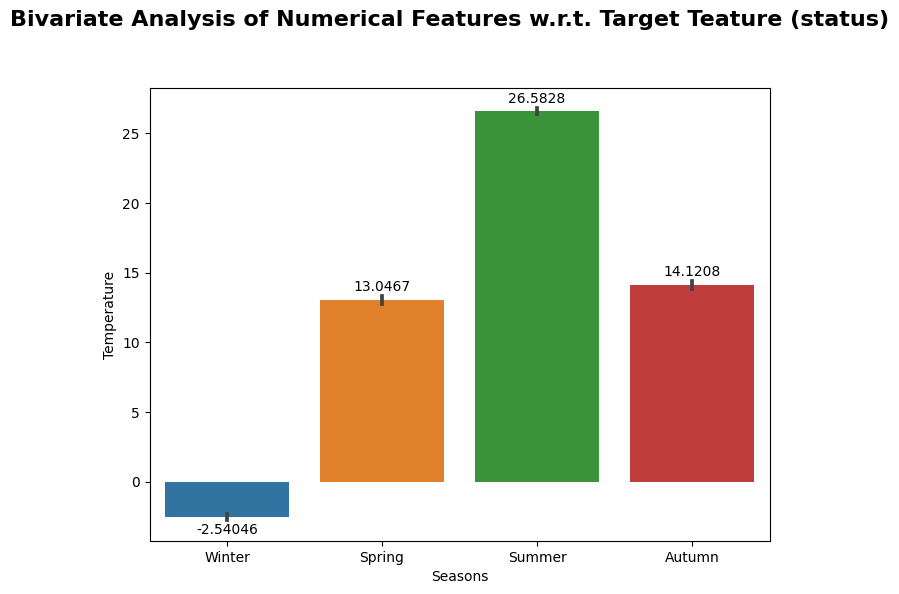

In [24]:
#plot b/w temp and season
plt.figure(figsize=(8, 6),dpi = 100)
plt.suptitle('Bivariate Analysis of Numerical Features w.r.t. Target Teature (status)',fontsize = 16, fontweight = 'bold',alpha = 1, y = 1.01)

ax = sns.barplot(x = 'Seasons', y = 'Temperature', data = df) # display mean value of temperature per category 

for p in ax.containers:
    ax.bar_label(p,padding=4)
plt.show()

<AxesSubplot:>

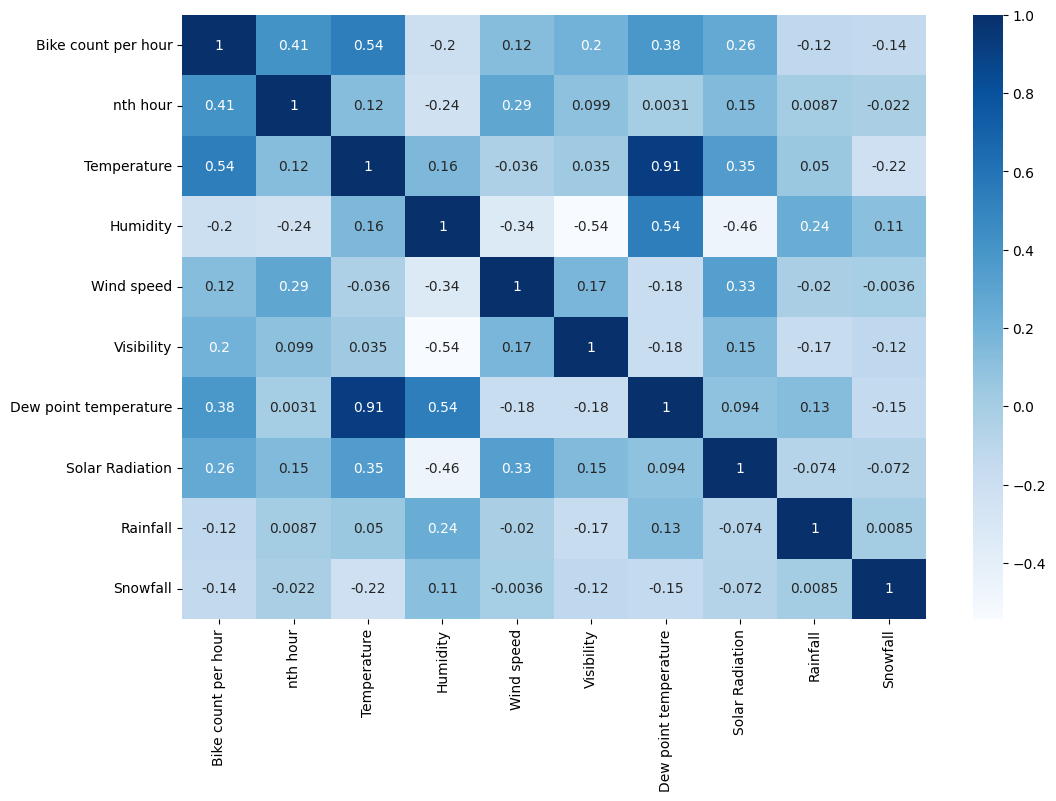

In [25]:
#correlation matrix of the dataset
plt.figure(figsize=(12, 8),dpi = 100)
sns.heatmap(df.corr(),annot=True,cmap='Blues')

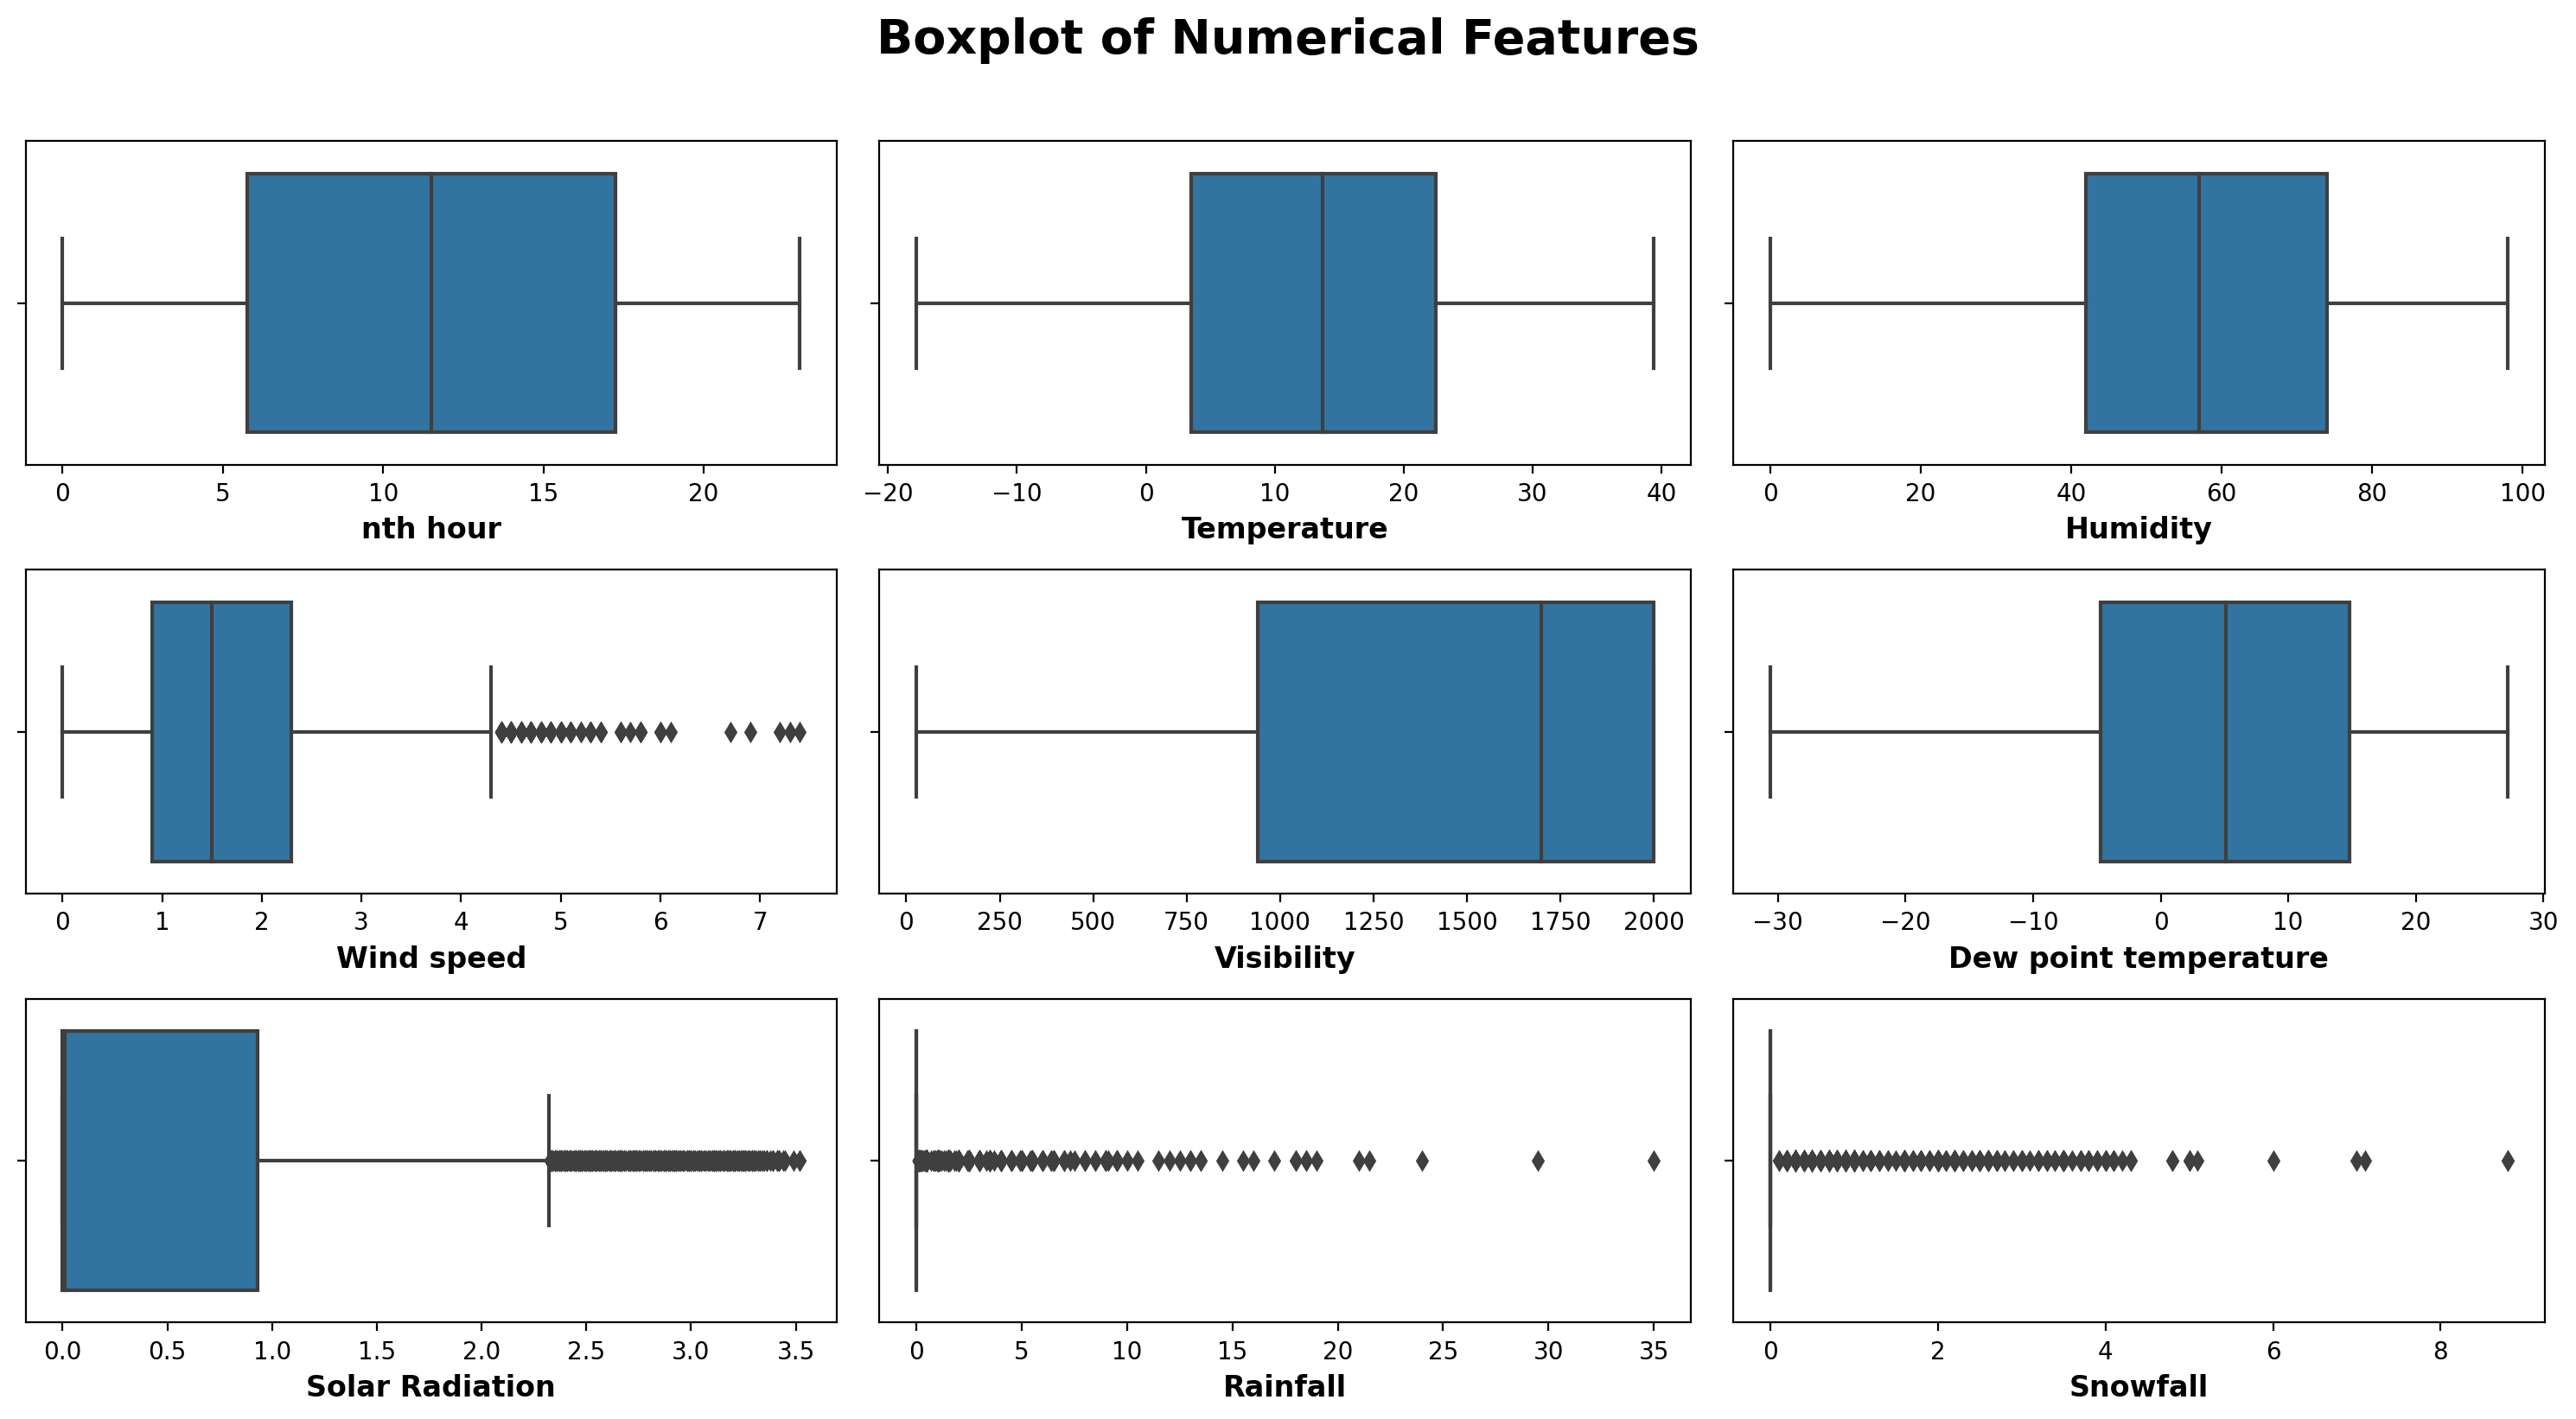

In [26]:
#check out the boxplot of all numerical features

def boxplot(df):
    plt.figure(figsize=(15, 15),dpi=200)
    plt.suptitle('Boxplot of Numerical Features',fontsize = 20, fontweight = 'bold',alpha = 1, y = 1.01)

    i = 0
    for col in df:
        if (df[col].dtype !='object') and (col not in ['Bike count per hour']):
            plt.subplot(6,3,i+1)
            sns.boxplot(x = df[col])
            plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
            plt.tight_layout()
            i+=1
            
boxplot(df)

#### Observation:
- Outliers are observed in almost all the numerical features which may be helpful to us while model training. However we will check the ouliers again after imputation. so, let's not remove these outleirs.

### Feature Engineering

In this section we will perform the following tasks:

#### 1. Handling missing values:
There are number of ways to deal with missing values

   <img src="https://miro.medium.com/max/828/1*vhwpR-qisCWFdpmAugxcIA.webp" width="500"/>



**In deletion,** the particular feature or row having huge number of missing values are removed.

**In imputation,** the missing values are imputed using some techniques such as:
#### A. Univariate imputation techniques:
- the missing values are replaced using the balance data of that particular feature. Most famous and simple methods are **Mean,Median and Mode**. Out of which mean and median are used for numerical feature imputation whereas mode is used for categorical feature imputation. 

#### B. Multivariate imputation techniques:
- In this feature are imputed based on their relation with other features. Most used imputation techniques are:
    - **KNN Imputer:** KNN algorithm is used for feature imputation. it is suitable for both categorical as well as numerical features.
    - **Iterative Imputation:** MICE(Multiple Imputation by Chained Equation) technique is used under this imputation. in this any machine learning algorithm can be used for multiple iteration and imputing the features. it is suitable for both categorical as well as numerical features.
 
#### 2. Handling outliers:
- Oulier may impact the performance of the models but sometime they might be helpul. most commonly used techniques for treating outliers are:
    - **Z-score:**  we use the concept of standard normal distribution. every value outside -3 to +3 is treated as outlier and can be treated depending upon the problem we are trying to solve 
    
   <img src="https://miro.medium.com/max/828/1*ARpoeY3MdhFImq0JXAXtRw.webp" width="500"/>

    - **IQR method:** we use the concept of inter quartile range. every value outside range of lower limit to upper limit is treated as outlier and can be treated depending upon the problem statement
    
   <img src="https://www.statology.org/wp-content/uploads/2021/01/iqrOutlier1-768x204.png" width="500"/>
   
  - **Percentile method:** Based on problem statement and domain knowledge, we can choose the upper and lower limit for outlier treatment using percentile method

#### 3. Categorical features encoding
- Model do understand numerical values only, hence categorical features needs to be converted into numerical values. most common methods are given below:
    - One Hot Encoding
    - Label Encoding
    - Ordinal Encoding
    - Count of Frequency Encoding
    - Target Guided Ordinal Encoding
    - Probability Ratio Encoding

#### 4. Feature scaling
- Every feature is scaled to same range for having better results.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Bike count per hour    8760 non-null   int64  
 1   nth hour               8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew point temperature  8760 non-null   float64
 7   Solar Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage: 889.8+ KB


In [28]:
#split dataset into dependent and independent features
X = df.drop(['Bike count per hour'],axis=1)
y = df['Bike count per hour']

In [29]:
#ctegorical columns
cat_cols = X.select_dtypes(include = 'object').columns
print('Categorical Columns in independent features dataset:',cat_cols)
print('='*85)

#numerical columns
num_cols = X.select_dtypes(include = ['int64','float64']).columns
print('Numerical Columns in independent features dataset:',num_cols)

Categorical Columns in independent features dataset: Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')
Numerical Columns in independent features dataset: Index(['nth hour', 'Temperature', 'Humidity', 'Wind speed', 'Visibility',
       'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall'],
      dtype='object')


In [30]:
#split data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)

#training ctegorical columns
train_cat_cols = X_train.select_dtypes(include = 'object').columns
print('Categorical Columns in training dataset:',train_cat_cols)
print('='*85)

#training numerical columns
train_num_cols = X_train.select_dtypes(include = ['int64','float64']).columns
print('Numerical Columns in training dataset:',train_num_cols)

Shape of X_train: (6570, 12)
Shape of X_test: (2190, 12)
Categorical Columns in training dataset: Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')
Numerical Columns in training dataset: Index(['nth hour', 'Temperature', 'Humidity', 'Wind speed', 'Visibility',
       'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall'],
      dtype='object')


In [31]:
#create a class to make custom tranformer for numerical features imputation

class NumericalImputationMICE(BaseEstimator, TransformerMixin): 
    
    def __init__(self,columns):
        self.columns = columns
        return None
    
    def fit(self, X, y = None):
        #the type of X might be a DataFrame or a NumPy array depending on the previous transformer object that you use in the pipeline
        return self
    
    def transform(self, X, y = None):
        """
        Impute numeric data using MICE imputation with Decision Tree Regressor.
        (we can use any other regressors to impute the data)
        """
        impute_numeric = IterativeImputer(estimator = DecisionTreeRegressor(),max_iter = 3,initial_strategy = "mean")
        imputed_data = impute_numeric.fit_transform(X[self.columns])
        X[self.columns] =  imputed_data.astype(int)

        return X

In [32]:
#create a class to make custom tranformer for categorical features imputation

class CategoricalImputationMICE(BaseEstimator, TransformerMixin): 
    
    def __init__(self,columns):
        self.columns = columns
        return None
    
    def fit(self, X, y = None):
        #the type of X might be a DataFrame or a NumPy array depending on the previous transformer object that you use in the pipeline

        return self
    
    def transform(self, X, y = None):
        """
        Impute categoric data using MICE imputation with Decision Tree Classifier.
        Steps:
        1. Ordinal Encode the non-null values
        2. Use MICE imputation with Decision Tree Classifier to impute the ordinal encoded data
        (we can use any other classifier to impute the data)
        3. Inverse transform the ordinal encoded data.
        """

        fit_encoder={}
        for col in self.columns:
            #Label encode train data
            nn_vals = X[col][X[col].notnull()]
            fit_encoder[col] = LabelEncoder().fit(nn_vals)
            nn_vals_arr = np.array(fit_encoder[col].transform(nn_vals)).reshape(-1,)
            X[col].loc[df[col].notnull()] = nn_vals_arr

        #Impute the data using MICE with Gradient Boosting Classifier
        impute_categoric = IterativeImputer(estimator = DecisionTreeClassifier(), max_iter = 3, initial_strategy='most_frequent')
        imputed_data = impute_categoric.fit_transform(X[self.columns])

        X[self.columns] =  imputed_data.astype(int)

        #Inverse Transform categorical features
        for col in self.columns:
            #train_arr= np.array(df[col]).reshape(-1,1)
            X[col] = fit_encoder[col].inverse_transform(X[col])

        return X

From univariate Anaysis we have seen that some of the features (like **Bike count per Hour,** **Wind Speed,** **Solar Radiation** and **visibilty** are not normally distributed. It may impact the impact the performance of the model and it needs to tranformed using some kind of transoformers mentioned below:

Genrally for all those features, we shall check the distribution using all these transformations and shall pick up the best suitable one.

**Function Transformations:**
1. **Log transformation:** It tranform the feeature by taking log of the feature. This transformation is mostly used, we the distribution is highy right skewed.
2. **Square tranformation:** It tranform the feeature by taking by taking square of the feature . It is mostly suitble for left skewed distribution
3. **Square root tranformation:** It tranform the feeature by taking by taking square-root of the feature . It is mostly suitble for right skewed distribution
4. **Reciprocal transformation:** The reciprocal transformation will give little effect on the shape of the distribution. This transformation can be only used for non-zero values.

**Power Transformations:**
1. **Box-Cox transformation:** It tranform the feeature by choosing appropriate value of power of the feature.It can't be applied to zero or negative values.
2. **Yeo-Johnson transformation:** It tranform the feeature by choosing appropriate value of power of the feature.It can be applied to positive, zero or negative values.

The major cons of using log transformation and reciprocal transformation if any value is '0' then log0 = infinity and in inverse it becomes 1/0 =infinity, so if the dataset has 0 in it and we cannot replace zero with other means then we better avoid usage of log and inverse transformation as medium to cure skewness.

As a result of which, **log(x)** is replaced with **log1p(x)** which is equal to log(1+x) and this way zero values can also be handled in log tranformation.

Generally the skewness is ranged between -1 and 1. if

- the skewness is between 0.5 to -0.5 then it is symmetrical
- the skewness is between 0.5 to 1 or -0.5 to -1 they are lightly skewed
- the skewness is higher than 1 or -1 then it is highly skewed


In [33]:
power_params = [('numerical_feature_transformer', FunctionTransformer(func = np.sqrt),["Wind speed"])]

#create an object of column tranforemer pertaining to nuemerical features power transformation
power_transformer = ColumnTransformer(power_params,remainder='passthrough')

In [34]:
encoding_params = [('categorical_encoder', OneHotEncoder(sparse = False, handle_unknown='ignore',drop = 'first'),[9,10,11])]

#create an object of column tranforemer pertaining to categorical features encoding
cat_encoding_trf = ColumnTransformer(encoding_params,remainder='passthrough')

In [35]:
scaling_params = [('numerical_scaler', MinMaxScaler(),slice(0,15))]

#create an object of column tranforemer pertaining to feature scaling
scaler = ColumnTransformer(scaling_params) #column get incereased after one hot encoding

In [36]:
#create a pipline and definr the steps to follow
pipline_steps = [('numerical_imputer',NumericalImputationMICE(columns=train_num_cols)),
                ('categorical_imputer',CategoricalImputationMICE(columns=train_cat_cols)),
                ('numerical_feature_transformer',power_transformer),
                ('categorical_encoder',cat_encoding_trf),
                ('feature_scaler',scaler)]

In [37]:
#create an object of pipeline
pipeline = Pipeline(pipline_steps)

#display pipline
set_config(display='diagram')

pipeline

Pipeline(steps=[('numerical_imputer',
                 NumericalImputationMICE(columns=Index(['nth hour', 'Temperature', 'Humidity', 'Wind speed', 'Visibility',
       'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall'],
      dtype='object'))),
                ('categorical_imputer',
                 CategoricalImputationMICE(columns=Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object'))),
                ('numerical_fe...
                                   transformers=[('numerical_feature_transformer',
                                                  FunctionTransformer(func=<ufunc 'sqrt'>),
                                                  ['Wind speed'])])),
                ('categorical_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [9, 10, 11])])),
                ('feature_scaler',
                 ColumnTransformer(transformers=[('numerical_scaler',
                                                  MinMaxScaler(),
                                                  slice(0, 15, None))]))])

In [38]:
#create a copy of X_train to show stepwise implementation
X_train_copy = X_train.copy()

#apply numerical imputer 
numerical_imputer_object = pipeline['numerical_imputer'].fit_transform(X_train_copy)
numerical_imputer_object.head()

,nth hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
2223,15,16,14,2,1828,-11,2,0,0,Spring,No Holiday,Yes
798,6,-6,48,2,1991,-15,0,0,0,Winter,No Holiday,Yes
7752,0,11,71,1,1997,6,0,0,0,Autumn,No Holiday,Yes
734,14,3,28,3,1956,-13,1,0,0,Winter,Holiday,Yes
2881,1,11,77,2,593,7,0,0,0,Spring,No Holiday,Yes


In [39]:
#apply categorical imputer 
categorical_imputer_object = pipeline['categorical_imputer'].fit_transform(numerical_imputer_object)
categorical_imputer_object.head()

,nth hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
2223,15,16,14,2,1828,-11,2,0,0,Spring,No Holiday,Yes
798,6,-6,48,2,1991,-15,0,0,0,Winter,No Holiday,Yes
7752,0,11,71,1,1997,6,0,0,0,Autumn,No Holiday,Yes
734,14,3,28,3,1956,-13,1,0,0,Winter,Holiday,Yes
2881,1,11,77,2,593,7,0,0,0,Spring,No Holiday,Yes


In [40]:
#apply power transformer
power_transformer_object = pipeline['numerical_feature_transformer'].fit_transform(categorical_imputer_object)
transformed = pd.DataFrame(power_transformer_object,columns=['nth hour', 'Temperature', 'Humidity', 'Wind speed', 'Visibility','Dew point temperature',
                                                             'Solar Radiation', 'Rainfall', 'Snowfall','Seasons','Holiday','Functioning Day'])
transformed.head()

,nth hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,1.414214,15,16,14,1828,-11,2,0,0,Spring,No Holiday,Yes
1,1.414214,6,-6,48,1991,-15,0,0,0,Winter,No Holiday,Yes
2,1.0,0,11,71,1997,6,0,0,0,Autumn,No Holiday,Yes
3,1.732051,14,3,28,1956,-13,1,0,0,Winter,Holiday,Yes
4,1.414214,1,11,77,593,7,0,0,0,Spring,No Holiday,Yes


In [41]:
#apply one hot encoding on categorical columns 
encoder = pipeline['categorical_encoder'].fit_transform(power_transformer_object)
pd.DataFrame(encoder).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,1.0,1.0,1.414214,15,16,14,1828,-11,2,0,0
1,0.0,0.0,1.0,1.0,1.0,1.414214,6,-6,48,1991,-15,0,0,0
2,0.0,0.0,0.0,1.0,1.0,1.0,0,11,71,1997,6,0,0,0
3,0.0,0.0,1.0,0.0,1.0,1.732051,14,3,28,1956,-13,1,0,0
4,1.0,0.0,0.0,1.0,1.0,1.414214,1,11,77,593,7,0,0,0


In [42]:
#apply standard scaler
scaler_object = pipeline['feature_scaler'].fit_transform(encoder)
pd.DataFrame(scaler_object).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,1.0,1.0,0.534522,0.652174,0.589286,0.142857,0.912557,0.333333,0.666667,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,0.534522,0.260870,0.196429,0.489796,0.995425,0.263158,0.000000,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.377964,0.000000,0.500000,0.724490,0.998475,0.631579,0.000000,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.654654,0.608696,0.357143,0.285714,0.977631,0.298246,0.333333,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.534522,0.043478,0.500000,0.785714,0.284698,0.649123,0.000000,0.0,0.0


In [43]:
X_train.shape

(6570, 12)

In [44]:
#runnig all the steps in pipeline altogether 
X_train_trf = pipeline.fit_transform(X_train,y_train)
y_train_trf = np.sqrt(y_train)

#create dataframe of transformed X_train
pd.DataFrame(X_train_trf).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,1.0,1.0,0.534522,0.652174,0.589286,0.142857,0.912557,0.333333,0.666667,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,0.534522,0.260870,0.196429,0.489796,0.995425,0.263158,0.000000,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.377964,0.000000,0.500000,0.724490,0.998475,0.631579,0.000000,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.654654,0.608696,0.357143,0.285714,0.977631,0.298246,0.333333,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.534522,0.043478,0.500000,0.785714,0.284698,0.649123,0.000000,0.0,0.0


In [45]:
#transform test data using pipline
X_test_trf = pipeline.transform(X_test)
y_test_trf = np.sqrt(y_test)

#create dataframe of transformed X_test
pd.DataFrame(X_test_trf).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,1.0,1.0,0.377964,0.347826,0.785714,0.704082,0.999492,0.894737,0.000000,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.534522,0.521739,0.875000,0.520408,0.389934,0.894737,1.000000,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.377964,0.608696,0.910714,0.510204,0.869853,0.912281,0.333333,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.377964,0.782609,0.589286,0.479592,0.815455,0.614035,0.000000,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.377964,0.304348,0.410714,0.520408,0.693950,0.473684,0.000000,0.0,0.0


#### While training the model, we will check the performance of the model using performance metrics such as MAE, RMSE r2_score and adjusted r2_score.

### Performance metrics:

**1. Mean Absolute Error:**

<img src="https://iq.opengenus.org/content/images/2020/01/mae-1.PNG" width="300"/>

where yᵢ is the actual expected output and ŷᵢ is the model’s prediction.
It is the simplest evaluation metric for a regression scenario and is not much popular compared to the following metrics.

**2. Mean Squared Error (MSE):**

<img src="https://iq.opengenus.org/content/images/2020/01/mse.PNG" width="300"/>

Here, the error term is squared and thus more sensitive to outliers as compared to Mean Absolute Error (MAE).

**3. Root Mean Squared Error (RMSE):**

<img src="https://iq.opengenus.org/content/images/2020/01/rmse.PNG" width="300"/>

Since MSE includes squared error terms, we take the square root of the MSE, which gives rise to Root Mean Squared Error (RMSE).

**4. R-Squared score:**

<img src="https://iq.opengenus.org/content/images/2020/01/rsquare-1.PNG" width="300"/>

R-squared is calculated by dividing the sum of squares of residuals (SSres) from the regression model by the total sum of squares (SStot) of errors from the average model and then subtract it from 1.

R-squared is also known as the Coefficient of Determination. It explains the degree to which the input variables explain the variation of the output / predicted variable.

A R-squared value of 0.81, tells that the input variables explains 81 % of the variation in the output variable. The higher the R squared, the more variation is explained by the input variables and better is the model.
Although, there exists a limitation in this metric, which is solved by the Adjusted R-squared.

**4. Adjusted R-Squared score:**

<img src="https://iq.opengenus.org/content/images/2020/01/adj.PNG" width="300"/>

Here, N is total sample size (number of rows) and p is number of predictors (number of columns)

The limitation of R-squared is that it will *either stay the same or increases with the addition of more variables, even if they do not have any relationship with the output variables. *

To overcome this limitation, Adjusted R-square comes into the picture as it penalizes you for adding the variables which do not improve your existing model.

Hence, if you are building Linear regression on multiple variables, it is always suggested that you use Adjusted R-squared to judge the goodness of the model.

If there exists only one input variable, R-square and Adjusted R squared are same.

In [47]:
def compare_models(models:dict):
    
    metrics = {'Models':models.keys(),'MAE_train':[],'MAE_test':[],'RMSE_train':[],'RMSE_test':[],
               'r2_score_train':[],'r2_score_test':[],'adj_r2_score_train':[],'adj_r2_score_test':[]}
    
    for model in models.values():
        #create an object of model
        model_object = model
        
        #fit the model to train dataset 
        model_object.fit(X_train_trf,y_train_trf)
        
        
        #predict the output on test dataset
        y_train_pred = model_object.predict(X_train_trf)
        y_test_pred = model_object.predict(X_test_trf)
        
        MAE_train = mean_absolute_error(y_train_trf,y_train_pred)
        MAE_test = mean_absolute_error(y_test_trf,y_test_pred)
        
        RMSE_train = np.sqrt(mean_squared_error(y_train_trf,y_train_pred))
        RMSE_test = np.sqrt(mean_squared_error(y_test_trf,y_test_pred))
        
        r2_score_train = r2_score(y_train_trf,y_train_pred)
        r2_score_test = r2_score(y_test_trf,y_test_pred)
        
        
        adj_r2_score_train = 1 - (1 - r2_score_train)*(len(y_train_trf)-1)/(len(y_train_trf)-X_train_trf.shape[1]-1)
        adj_r2_score_test = 1 - (1 - r2_score_test)*(len(y_test_trf)-1)/(len(y_test_trf)-X_test_trf.shape[1]-1)
        
        metrics['MAE_train'].append(MAE_train)
        metrics['MAE_test'].append(MAE_test)
       
        metrics['RMSE_train'].append(RMSE_train)
        metrics['RMSE_test'].append(RMSE_test)
        
        metrics['r2_score_train'].append(r2_score_train)
        metrics['r2_score_test'].append(r2_score_test)
        
        metrics['adj_r2_score_train'].append(adj_r2_score_train)
        metrics['adj_r2_score_test'].append(adj_r2_score_test)
    
    models_metrics = pd.DataFrame(metrics)
    
    return models_metrics

In [48]:
models = {'KNN Regressor' : KNeighborsRegressor(),
          'DecisionTreeRegressor' : DecisionTreeRegressor(),
          'RandomForestRegressor' : RandomForestRegressor(),
          'XGBRegressor' : XGBRegressor()}

models_without_tuning = compare_models(models)

In [49]:
models_without_tuning

,Models,MAE_train,MAE_test,RMSE_train,RMSE_test,r2_score_train,r2_score_test,adj_r2_score_train,adj_r2_score_test
0,KNN Regressor,2.924370,3.665430,4.314018,5.362111,0.880876,0.810023,0.880622,0.808800
1,DecisionTreeRegressor,0.002369,3.777695,0.081885,5.950940,0.999957,0.766008,0.999957,0.764502
2,RandomForestRegressor,1.041384,2.800828,1.604089,4.185581,0.983530,0.884244,0.983495,0.883499
3,XGBRegressor,1.638404,2.747919,2.426113,4.007859,0.962325,0.893866,0.962244,0.893183


In [50]:
model_hyperparameters = {'kNN_reg_hyperparamters':{'n_neighbors':[1,3,5,10,15,20]},
                         
                         'decision_tree_hyperparameters':{'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                                                          'splitter':['best','random'],
                                                          'ccp_alpha': [0.03,0.05,0.06,0.08,0.09]},
                         
                         'random_forest_hyperparameters':{'n_estimators':[50,80,100,120],
                                                          'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
                                                          'ccp_alpha': [0.03,0.05,0.06,0.08,0.09]},
                         
                         'xgb_hyperparameters':{'n_estimators':[50,80,100,120],
                                                'gamma':[0.5,0.6,0.7,0.8],
                                                'learning_rate': [0.01,0.05,0.1,0.15]}}

In [51]:
model_keys = list(model_hyperparameters.keys())
model_keys[0]

'kNN_reg_hyperparamters'

In [52]:
def ModelSelection(list_of_models,hyperparamter_dictionary):

    result = []
    i = 0
    for model in list_of_models.values():

        keys = model_keys[i]
        
        params = hyperparamter_dictionary[keys]
        
        grid_search = GridSearchCV(estimator = model, param_grid=params, cv = 5, scoring = 'r2',n_jobs=-1)

        grid_search.fit(X_train_trf,y_train_trf)

        result.append({'Model used': model, 'Best params': grid_search.best_params_})
        i+=1
        
    return result

In [53]:
best_hyperparameters = ModelSelection(list_of_models=models, hyperparamter_dictionary=model_hyperparameters)

In [54]:
best_hyperparameters

[{'Model used': KNeighborsRegressor(), 'Best params': {'n_neighbors': 5}},
 {'Model used': DecisionTreeRegressor(),
  'Best params': {'ccp_alpha': 0.08,
   'criterion': 'squared_error',
   'splitter': 'best'}},
 {'Model used': RandomForestRegressor(),
  'Best params': {'ccp_alpha': 0.03,
   'criterion': 'squared_error',
   'n_estimators': 120}},
 {'Model used': XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
               num_parallel_tree=1, predictor=

In [58]:
models_with_tuned_hyperparameters = {'KNN Regressor' : KNeighborsRegressor(n_neighbors = 5),
                                     'DecisionTreeRegressor' : DecisionTreeRegressor(criterion = 'squared_error', splitter = 'best',ccp_alpha = 0.08),
                                     'RandomForestRegressor' : RandomForestRegressor(criterion = 'squared_error',n_estimators =  120,ccp_alpha = 0.03),
                                     'XGBRegressor' : XGBRegressor(booster = 'gbtree', gamma = 0.5, learning_rate = 0.15, n_estimators = 100)}

In [59]:
models_with_tuning = compare_models(models_with_tuned_hyperparameters)

In [60]:
models_with_tuning

,Models,MAE_train,MAE_test,RMSE_train,RMSE_test,r2_score_train,r2_score_test,adj_r2_score_train,adj_r2_score_test
0,KNN Regressor,2.924370,3.665430,4.314018,5.362111,0.880876,0.810023,0.880622,0.808800
1,DecisionTreeRegressor,3.212394,3.532581,4.464198,5.075901,0.872438,0.829762,0.872166,0.828666
2,RandomForestRegressor,2.339378,2.962666,3.132522,4.310046,0.937191,0.877258,0.937057,0.876468
3,XGBRegressor,2.097743,2.773624,3.113083,4.097655,0.937968,0.889057,0.937836,0.888343


### Project Summary

#### Let Summarize all the steps teken in this project.
##### 1. Overview of the overall dataset such as
   - The overall dataste consist of 8670 rows and 14 columns.
   - Number of categorical columns are 4.
   - Numer of numerical columns are 10.
   - Checked the uniques categories and their repective value count in dataset.
    
##### 2. Checked for missing values an doutliers
   - Total missing values in dataset are zero.
   - Outliers are checked using boxplot and are observed in almost every numerical feature. but that might be important for model training purpose. so i have not removed.

##### 3. Exploratory Data Analysis
   - Univariate Analysis
       - Checked distribution of nuemrical and catgorical features. None of the numerical feature was normally distributed which may be due to the presence of the outliers.
   - Multivariate Analysis
       - Checked the behaviour of independent catgorical and numerical features with respect to target feature (Bike count per hour),
       - Correlation is also checked among feautres. however, that might not be correct results due to presence of missing values. Hence it needs to be checked once again after imputation.
       
##### 4. Feature Engineering

 The feature engineering has been done using Sklearn Pipeline which consist of numer of steps such as:
 - *Numerical features imputation* : Iterative imputation **(MICE imputation)** technique is used to impute numerical featues and the algorithm used in this technique was Decision Tree Regressor for numerical features.
 
 - *Categorical features imputation* : Iterative imputation **(MICE imputation)** technique is used to impute categorical features and the algorithm used in this technique was Decision Tree Classifier for categorical features.
 
 - *Numerical features transformer* : Model performs best when numeical features are numerical distributed. hence in steps we will try to transform the featuers that are not normally distributed. 

 - *Categorical feautre encoding* : Every categorical present in this dataset is hvaing 2 - 4 unique feature which needs to be converted into numerical values by using some techniques because the model doesn't understand categorical values.

- *Feature Scaling* : In this every is brought down to same range so that model can perform efftectively
 
##### 6. Model Building
   Models used are:
   
   - KNN Regression
   - DecisionTreeRegressor
   - RandomForestRegressor
   - XGBRegressor
   
Performance metrics like MAE, RMSE, r2_score were checked before and after hyperparameter tuning.

#### Conclusion

Recalling the problem statement, our aim is to predict bike count per hour for smooth supply?

- Also, if we talk about the performance, it become more important to check out r2_score.

- Therefore keeping above scenerio in mind, i have checked out **r2_score** in all the models and after careful observation, **XGBRegressor (r2_score:89%)** comes out to be the best model for this problem 